<a href="https://colab.research.google.com/github/Chunporo/ADY201c/blob/main/Assignment3MAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Look for a suitable secondary data
We choose data from  the advertising dataset given in ISLR and analyse the relationship between 'TV advertising' and 'sales' using a simple linear regression model. [Link](https://www.kaggle.com/datasets/ashydv/advertising-dataset)

# Task 2: Import Libraries and load the data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
url ='https://github.com/Chunporo/ADY201c/blob/main/advertising.csv?raw=true'
df = pd.read_csv(url)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


# Task 3: Visualize the Data

In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


The sales are in thousands of units and the budget is in thousands of dollars.




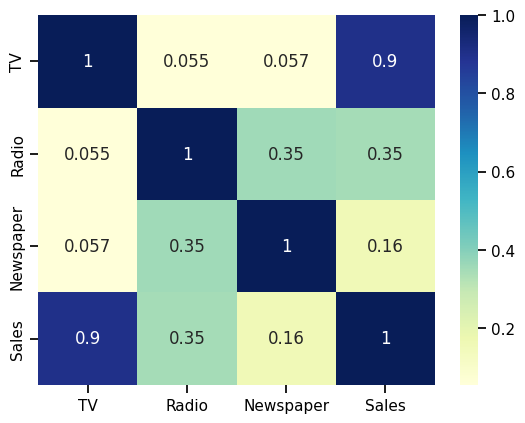

In [ ]:
#Using heatmap to draw the correlation table
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

We will see the correlation betwen `Sales` and `TV` is so high (0.9), so we will use `TV` to predict `Sales` by using linear regression algorithm.

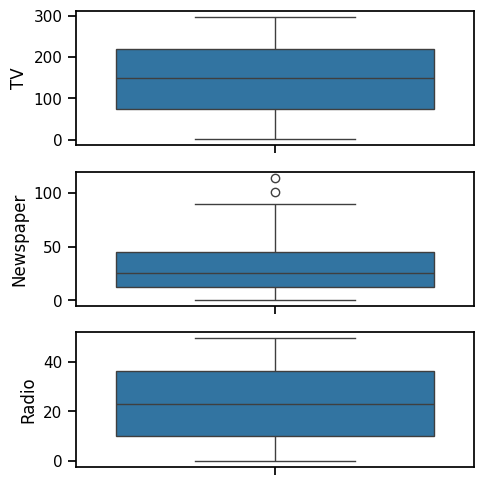

In [ ]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

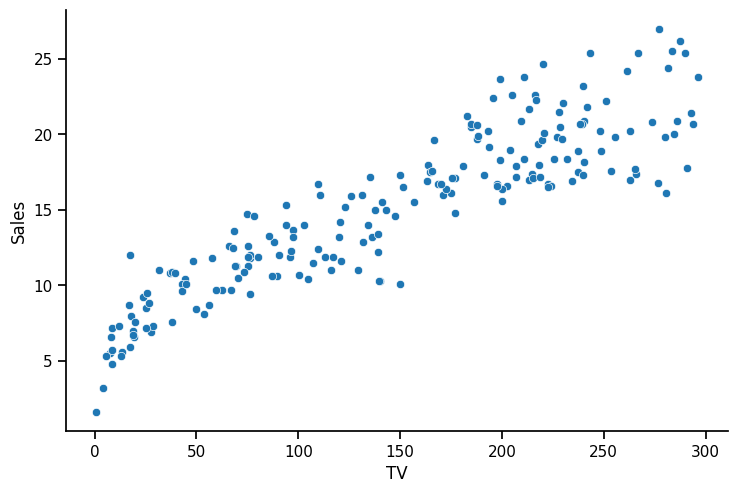

In [ ]:
# Let's see how Sales are related with TV using scatter plot.
sns.pairplot(df, x_vars='TV', y_vars='Sales', height=5, aspect=1.5, kind='scatter')
plt.show()

# Task 4: Compute the Cost Function $J(θ)$


The objective of linear regression is to minimize the cost function
$$
J(\theta)=\frac{1}{2 n} \sum_{i=1}^n\left(f_\theta\left(x^{(i)}\right)-y^{(i)}\right)^2
$$
where $f_\theta(x)$ is given by the linear model $f_\theta(x)=\theta^{\top} x=\theta_0+\theta_1 x_1$.

In [ ]:
#The code below calculates cost by looping over each example. In each loop:
# `f_wb`, a prediction is calculated
# the difference between the target and the prediction is calculated and squared.
# this is added to the total cost.
def compute_cost(x, y, w, b):
    """
    Computes the cost function for linear regression.

    Args:
      x (ndarray (m,)): Data, m examples
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters

    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0]

    cost_sum = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i]) ** 2
        cost_sum = cost_sum + cost
    total_cost = (1 / (2 * m)) * cost_sum

    return total_cost

# Task 5: Implement Gradient Descent

In [ ]:
# data = pd.read_csv('advertise.csv')
data=df.copy()
# Assuming the correct column names after inspection
# Adjust these based on the actual column names in your CSV
X = data['TV'].values
y = data['Sales'].values

# Feature scaling
X = (X - np.mean(X)) / np.std(X)

# Add a column of ones to X to account for theta_0 (intercept term)
X = np.c_[np.ones(X.shape[0]), X]

# Initialize theta (parameters), can start with zeros or random values
theta = np.zeros(2)

# Number of training examples
m = y.size

# Define the hypothesis function
def hypothesis(X, theta):
    return np.dot(X, theta)

# Compute the cost function
def compute_cost(X, y, theta):
    m = y.size
    predictions = hypothesis(X, theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Implement gradient descent
def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.size
    cost_history = np.zeros(num_iters)

    for i in range(num_iters):
        predictions = hypothesis(X, theta)
        errors = predictions - y
        theta = theta - (alpha / m) * np.dot(X.T, errors)
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

# Set learning rate and number of iterations
alpha = 0.01
num_iters = 1500

# Perform gradient descent
theta, cost_history = gradient_descent(X, y, theta, alpha, num_iters)

print(f'Theta found by gradient descent: {theta}')
print(f'Theta 0: {theta[0]}')
print(f'Theta 1: {theta[1]}')


Theta found by gradient descent: [15.13049571  4.74996453]
Theta 0: 15.130495708143663
Theta 1: 4.749964531700829


# Task 6: Visualizing the Cost Function $J(0)$


# Task 7: Plotting the Convergence

# Task 8: Training data with Univariate Linear Regression Fit (Best Fit Line)

# Task 9: Inference using the optimized $\theta$ values.